<a href="https://colab.research.google.com/github/daveveed/Geo-Data-Science/blob/main/adding_Basemap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
if 'google.colab' in str(get_ipython()):
  !pip install contextily

In [2]:
import contextily as cx
import geopandas as gpd, matplotlib.pyplot as plt, os, requests, shapely

## creating a solar eclipse map


In [3]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists (data_folder):
  os.mkdir(data_folder)
if not os.path.exists(output_folder):
  os.mkdir(output_folder)

In [11]:
def download (url):

  filename = os.path.join(data_folder, os.path.basename(url))

  if not os.path.exists(filename):
    response = requests.get(url, allow_redirects=True)

    with open(filename, 'wb') as f:
      f.write(response.content)

      print('downloaded', filename)

In [12]:
path_shapefile = 'upath17'
umbra_shapefile = 'umbra17'
penumbra_shapefile = 'penum17'

shapefile_exts = ['.shp', '.shx', '.dbf', '.prj']

data_url = 'https://github.com/spatialthoughts/python-dataviz-web/releases/' \
  'download/eclipse/'

for shapefile in [path_shapefile, umbra_shapefile, penumbra_shapefile]:
  for ext in shapefile_exts:
    url = data_url + shapefile + ext
    download(url)

downloaded data/upath17.shp
downloaded data/upath17.shx
downloaded data/upath17.dbf
downloaded data/upath17.prj
downloaded data/umbra17.shp
downloaded data/umbra17.shx
downloaded data/umbra17.dbf
downloaded data/umbra17.prj
downloaded data/penum17.shp
downloaded data/penum17.shx
downloaded data/penum17.dbf
downloaded data/penum17.prj


In [13]:
path_shapefile_path = os.path.join(data_folder, path_shapefile + '.shp')
path_gdf = gpd.read_file(path_shapefile_path)
path_gdf

Name  Time0  Time1                                           geometry
0  UmbraPath  17:00  19:50  POLYGON ((-130.08398 45.36563, -130.07227 45.3...

In [14]:
umbra_shapefile_path = os.path.join(
    data_folder, umbra_shapefile + '.shp')
umbra_gdf = gpd.read_file(umbra_shapefile_path)
umbra_gdf[:5]

Name   Time   TZ                                           geometry
0  Umbra01  10:00  PDT  POLYGON ((-141.73242 44.78022, -141.7207 44.78...
1  Umbra02  10:10  PDT  POLYGON ((-130.59961 45.3565, -130.58789 45.35...
2  Umbra03  10:20  PDT  POLYGON ((-121.85742 45.20222, -121.8457 45.20...
3  Umbra04  11:30  MDT  POLYGON ((-114.7793 44.60543, -114.76758 44.60...
4  Umbra05  11:40  MDT  POLYGON ((-108.63867 43.72656, -108.62695 43.7...

## plotting

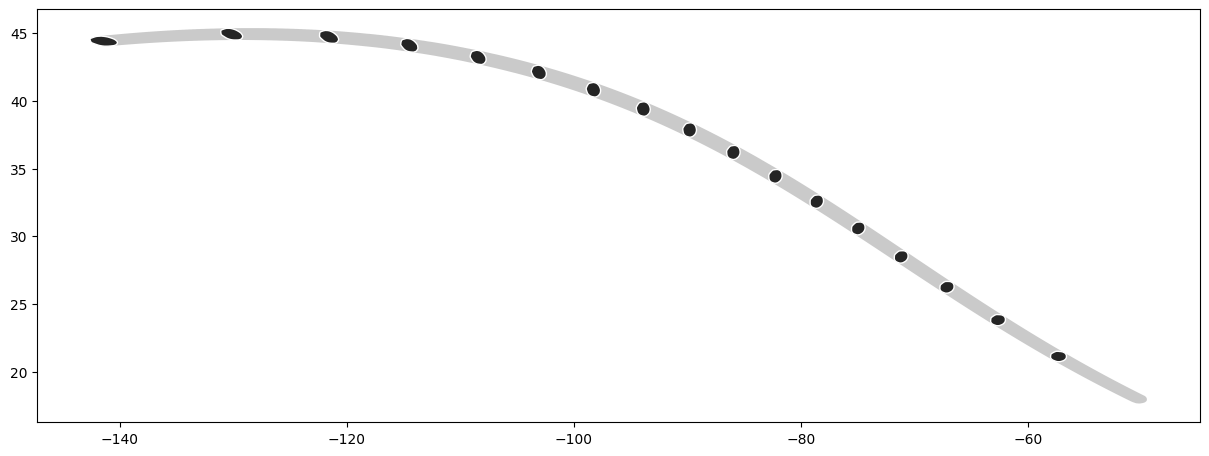

In [16]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(15,7)

path_gdf.plot(ax=ax, facecolor='#969696', edgecolor='none', alpha=0.5)
umbra_gdf.plot(ax=ax, facecolor='#252525', edgecolor='white')


plt.show()

## adding basemaps

In [19]:
providers = cx.providers
providers

{'OpenStreetMap': {'Mapnik': {'url': 'https://tile.openstreetmap.org/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.Mapnik'},
  'DE': {'url': 'https://tile.openstreetmap.de/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.DE'},
  'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'bounds': [[45, 5], [48, 11]],
   'name': 'OpenStreetMap.CH'},
  'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
   'max_zoom': 20,
   'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.France'},
  'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
   'name': 'OpenStreetMap.HOT'},
  'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'bounds': [[46.2, -5.5], [50, 0.7]],
   'name': 'OpenStreetMap.BZH'},
  'CAT': {'url': 'https://tile.openstreetmap.bzh/ca/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="https://www.openstreetmap.cat" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'name': 'OpenStreetMap.CAT'}},
 'MapTilesAPI': {'OSMEnglish': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'en/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMEnglish'},
  'OSMFrancais': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'fr/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMFrancais'},
  'OSMEspagnol': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contribut

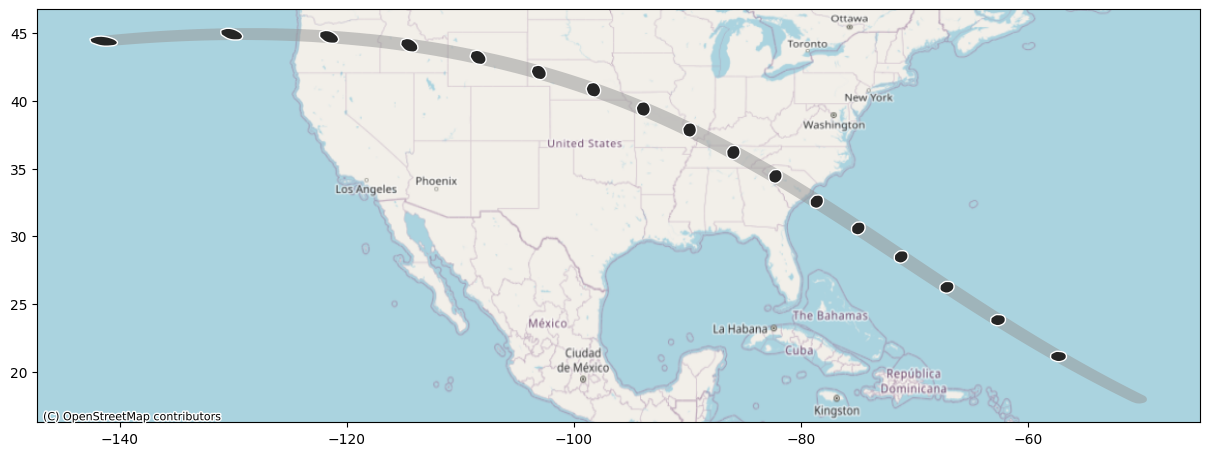

In [23]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(15,7)

path_gdf.plot(ax=ax, facecolor='#969696', edgecolor='none', alpha=0.5)
umbra_gdf.plot(ax=ax, facecolor='#252525', edgecolor='white')

#basemaps
# cx.add_basemap(ax=ax, crs = path_gdf.crs,
#                source= cx.providers.OpenTopoMap)
cx.add_basemap(ax=ax, crs = path_gdf.crs,
               source= cx.providers.OpenStreetMap.Mapnik, zoom=4)

plt.show()

In [25]:
# reproject to equal area projection

crs = 'EPSG:9311'

path_reprojected = path_gdf.to_crs(crs)
umbra_reprojected = umbra_gdf.to_crs(crs)

# Use the bounding box coordinates for continental us
usa = shapely.geometry.box(-125, 24, -66, 49)
usa_gdf = gpd.GeoDataFrame(geometry=[usa], crs='EPSG:4326')
usa_gdf_reprojected = usa_gdf.to_crs(crs)
bounds = usa_gdf_reprojected.total_bounds

bounds

array([-2541705.69236695, -1960818.71207086,  3408818.26526139,
         969702.54831045])

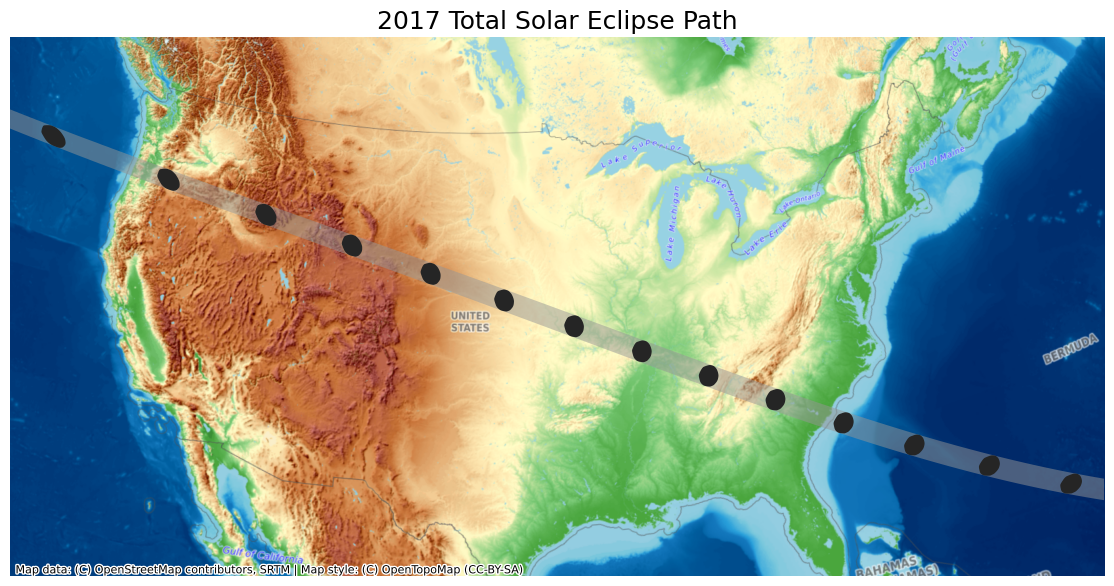

In [26]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)

# Set the bounds  when using contextilx first set bounds so it only download tiles for just that region
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])

path_reprojected.plot(
    ax=ax,
    facecolor='#969696',
    edgecolor='none',
    alpha=0.5)

umbra_reprojected.plot(
    ax=ax,
    facecolor='#252525',
    edgecolor='none')

cx.add_basemap(
    ax,
    crs=path_reprojected.crs,
    source=cx.providers.OpenTopoMap,
    zoom=5)

ax.set_axis_off()
ax.set_title('2017 Total Solar Eclipse Path', size = 18)

plt.show()

In [27]:
penumbra_shapefile_path = os.path.join(data_folder, penumbra_shapefile + '.shp')
penumbra_gdf = gpd.read_file(penumbra_shapefile_path)
penumbra_reprojected = penumbra_gdf.to_crs(crs)
penumbra_reprojected

Name  Obscur                                           geometry
0  Penumbra90  0.8999  POLYGON ((-2173771.327 785874.329, -2170802.55...
1  Penumbra75  0.7500  POLYGON ((-2115210.658 1280706.27, -2112516.39...
2  Penumbra50  0.5000  POLYGON ((-5038961.859 2917526.896, -5035860.5...
3  Penumbra25  0.2500  POLYGON ((-5611804.242 2496237.684, -5610733.8...
4  Penumbra00  0.0000  POLYGON ((-6429500.671 1778744.247, -6429115.4...

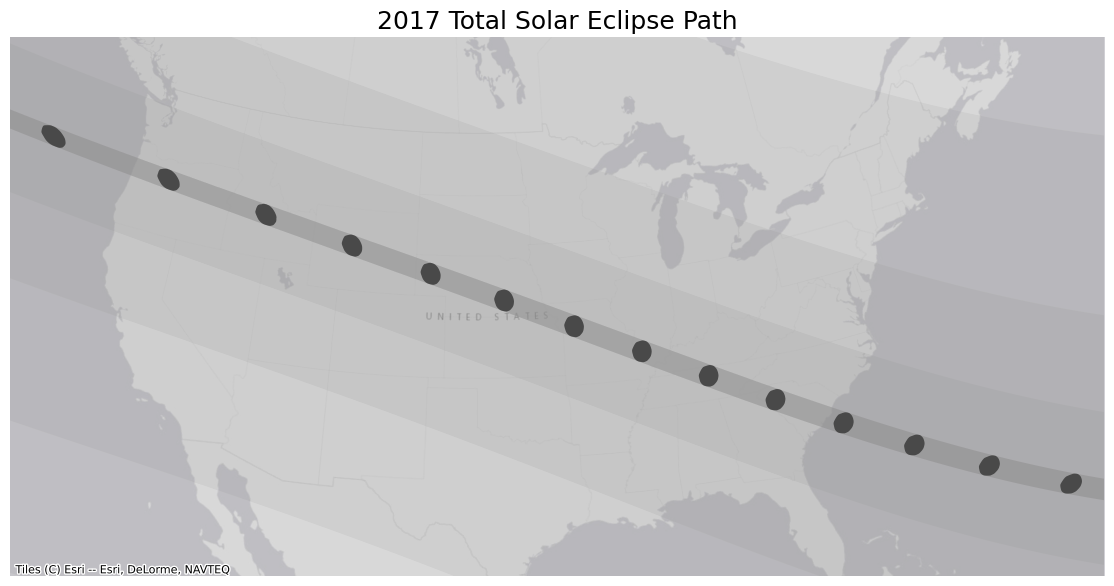

In [36]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)

# Set the bounds  when using contextilx first set bounds so it only download tiles for just that region
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])

path_reprojected.plot(
    ax=ax,
    facecolor='#969696',
    edgecolor='none',
    alpha=0.5)

umbra_reprojected.plot(
    ax=ax,
    facecolor='#252525',
    edgecolor='none')

penumbra_reprojected.plot(ax=ax, facecolor='grey', alpha=0.1,)

cx.add_basemap(
    ax,
    crs=path_reprojected.crs,
    source=cx.providers.Esri.WorldGrayCanvas,
    zoom=5)

ax.set_axis_off()
ax.set_title('2017 Total Solar Eclipse Path', size = 18)

plt.show()